<a href="https://colab.research.google.com/github/joaovictoramaralgoncalves/Projetos_de_aprendizado/blob/master/SGS_BCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula do Código Quant - Youtube

Título: COMO ACESSAR A BASE DE DADOS DO BANCO CENTRAL DO BRASIL COM PYTHON | Python para Investimentos #10

Link: https://www.youtube.com/watch?v=7rFsu48oBn8&ab_channel=C%C3%B3digoQuant-Finan%C3%A7asQuantitativas

#Séries Temporais do Banco Central
LINK: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
######O **Sistema Gerenciador de Séries Temporais (SGS)** tem o objetivo de consolidar e tornar disponíveis informações econômico-financeiras, bem como manter uniformidade entre os documentos produzidos com base em séries temporais nele armazenadas.

As séries podem ser consultadas individualmente, em grupos ou listas personalizadas, ou de forma automática, de acordo com as instruções constantes no menu Ajuda, submenu Ajuda do sistema, opção Serviços automatizados (webservices).

O Banco Central do Brasil não assume nenhuma responsabilidade por defasagem, erro ou outra deficiência em informações prestadas em série temporal cujas fontes sejam externas a esta instituição, bem como por quaisquer perdas ou danos decorrentes de seu uso.

#Importando Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

#Obtendo Dados através da API do BCB

In [ ]:
def consulta_bc(codigo_bcb):
  url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst= True)
  df.set_index('data', inplace=True)
  return df

In [ ]:
# Exemplos de Consultas
ipca = consulta_bc(433)
igpm = consulta_bc(189)
selic_meta = consulta_bc(432)
reservas_internacionais_diaria = consulta_bc(13621) #reserva caindo quer dizer que está vendendo reserva
pnadc_taxa_de_desemprego = consulta_bc(24369)
cdi_diario = consulta_bc(12)

<Axes: xlabel='data'>

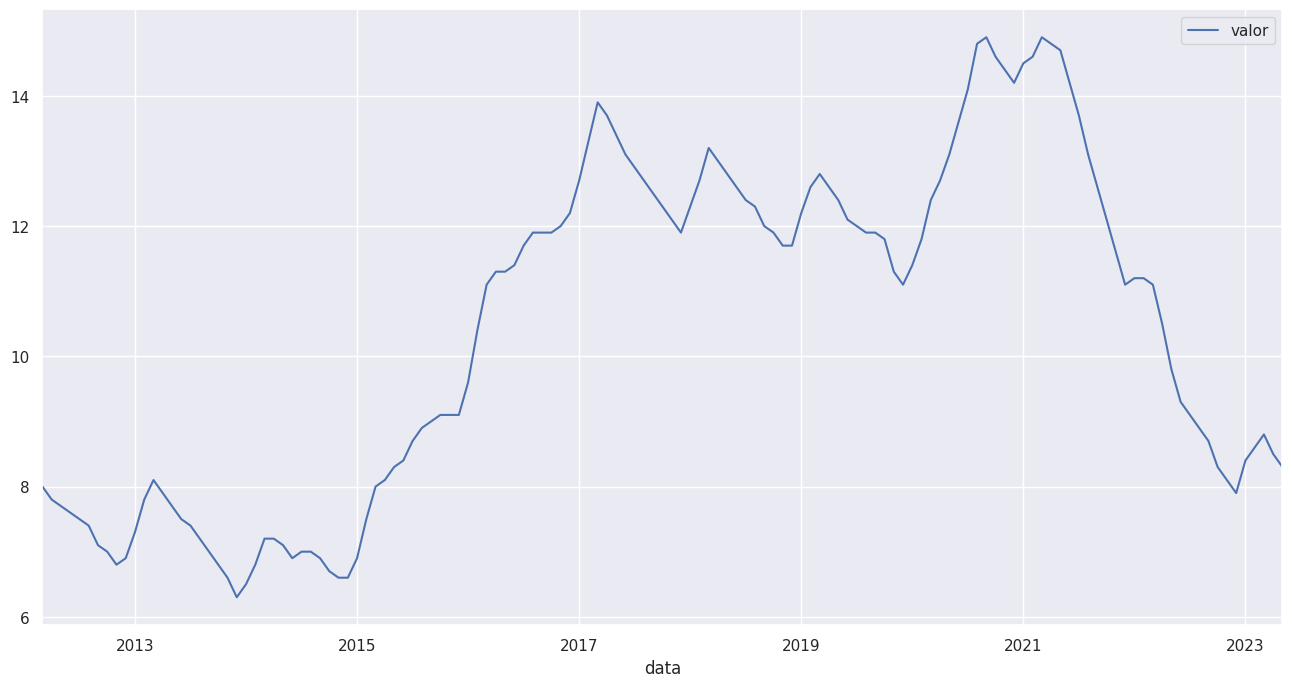

In [ ]:
pnadc_taxa_de_desemprego.plot()

#Pegando Dados do Yahoo Finance

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [ ]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]
ibov_return = ibov.pct_change()

[*********************100%%**********************]  1 of 1 completed


##Comparando ibov e cdi

In [ ]:
#criando uma data de início para os dois começarem no mesmo dia, para a comparação
data_inicio = '2015-01-01'

In [ ]:
ibov_return_acumulado = (1+ ibov_return[ibov_return.index >= data_inicio]).cumprod() #calculando o acumulado do ibov
ibov_return_acumulado.iloc[0]=1 #deixando o primeiro valor igual a 1

In [ ]:
cdi_acumulado = (1+ (cdi_diario[cdi_diario.index >= data_inicio]/100)).cumprod() #calculando o acumulado. Esse eu dividi por cem, pois era um percentual
cdi_acumulado.iloc[0] =1 #deixando o primeiro valor igual a 1
cdi_acumulado

,valor
data,
2015-01-02,1.000000
2015-01-05,1.000869
2015-01-06,1.001304
2015-01-07,1.001739
2015-01-08,1.002175
...,...
2023-08-10,2.085473
2023-08-11,2.086496
2023-08-14,2.087519


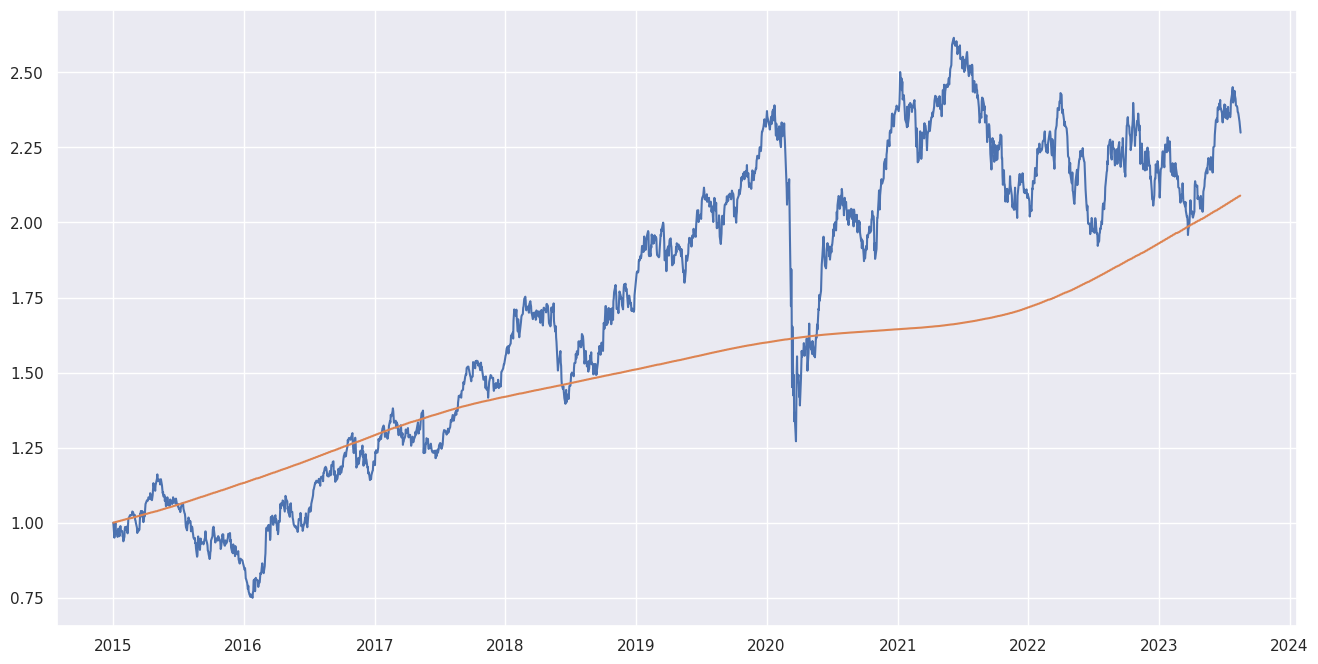

In [ ]:
#criando o gráfico comparativo entra o ibovespa e o cdi
fig, ax= plt.subplots() #cirando um gráfico com subplots
ax.plot(ibov_return_acumulado)
ax.plot(cdi_acumulado);